##基礎演習S 後半第4回

NE21-1228F
鈴木　拓己

In [ ]:
# 参考：インストール済みパッケージ
p <- installed.packages()
rownames(p)

In [ ]:
# 必要に応じて「ランタイム」＋「ランタイムを再起動」
# IPAフォントをインストール
system("apt-get install -y fonts-ipafont")
# フォント一覧を表示
# systemfonts::system_fonts()
# グラフィクスパラメータのフォントファミリーをIPAGothicに
par(family="IPAGothic")
# 確認（グラフでの日本語）
dat <- cars
head(dat, 3)
colnames(dat) <- c("速度","距離")
plot(dat)

In [39]:
# ライブラリ
library(tidyverse)

### Ex.4-1： carsデータで多項式モデリング（過学習）

In [32]:
# 関数定義（Ex.4-1～4-3用）
RMSE <- function(f, y) sqrt(mean((f-y)^2))
MAE <- function(f, y) mean(abs(f-y))
#---
g <- function(x, a){        # n次多項式によるモデル，aの要素は昇べき順
  n <- length(a)
  z <- a[n]
  if(n > 1){
    for(i in (n-1):1){        # 計算は降べき順
      z <- z*x + a[i]
    }
  }
  return(z)
}

In [33]:
# データ定義（Ex.4-1～4-3用）
X <- x0 <- data.frame(cars$speed)
for(i in 2:10) X <- cbind(X, X[,i-1]*x0)
colnames(X) <- paste0('x', 1:10)
# distを目的変数yとする
y <- cars$dist
# dはyとXをまとめたもの
d <- data.frame(y, X)
#---------------------------------------
# [1]
#（ランダムに）Xの70%を訓練データX1，残り30%をテストデータX2とする
set.seed(123)          # 乱数種設定　※再現性のため
n <- nrow(X); r <- 0.7
id <- sample(1:n, round(n*r)) %>% sort()

X1 <- X[id, ]
X2 <- X[-id, ]
d1 <- d[id,]
d2 <- d[-id,]

#変数idに1からn(Xの行数)の数を0.7✖️n回(四捨五入)サンプリング(seed値を設定しているため一定になる)を行い、昇順に並び替える。
#X1にはXのidに対応する行を代入し、X2にはXのidに対応しない行を代入する。
#d1にはdのidに対応する行を代入し、d2にはdのidに対応しない行を代入する。

In [73]:
dat <- data.frame(cars$speed,cars$dist)
dat1 <-dat[id,];colnames(dat1)[1] <- 'x';colnames(dat1)[2] <- 'y'
dat2 <-dat[-id,];colnames(dat2)[1] <- 'x';colnames(dat2)[2] <- 'y'

[1] "---------------------------------------"


Call:
lm(formula = y ~ ., data = d)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.2921  -5.2290  -0.4567   4.8960  16.7079 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.228e+05  3.069e+05   0.400    0.693
x1          -8.515e+04  2.288e+05  -0.372    0.713
x2           2.556e+04  7.502e+04   0.341    0.736
x3          -4.357e+03  1.425e+04  -0.306    0.762
x4           4.649e+02  1.737e+03   0.268    0.791
x5          -3.220e+01  1.422e+02  -0.226    0.823
x6           1.444e+00  7.921e+00   0.182    0.857
x7          -4.027e-02  2.967e-01  -0.136    0.893
x8           6.212e-04  7.161e-03   0.087    0.932
x9          -3.596e-06  1.006e-04  -0.036    0.972
x10         -1.066e-08  6.258e-07  -0.017    0.987

Residual standard error: 10.39 on 24 degrees of freedom
Multiple R-squared:  0.8633,	Adjusted R-squared:  0.8063 
F-statistic: 15.15 on 10 and 24 DF,  p-value: 4.537e-08


[1] "---------------------------------------"

[1] 8.603477

[1] 6.870829

[1] "---------------------------------------"

Warning message:
“Removed 24 row(s) containing missing values (geom_path).”


[1] "---------------------------------------"

[1] 1311.064

[1] 497.9625

[1] "---------------------------------------"

Warning message:
“Removed 37 row(s) containing missing values (geom_path).”


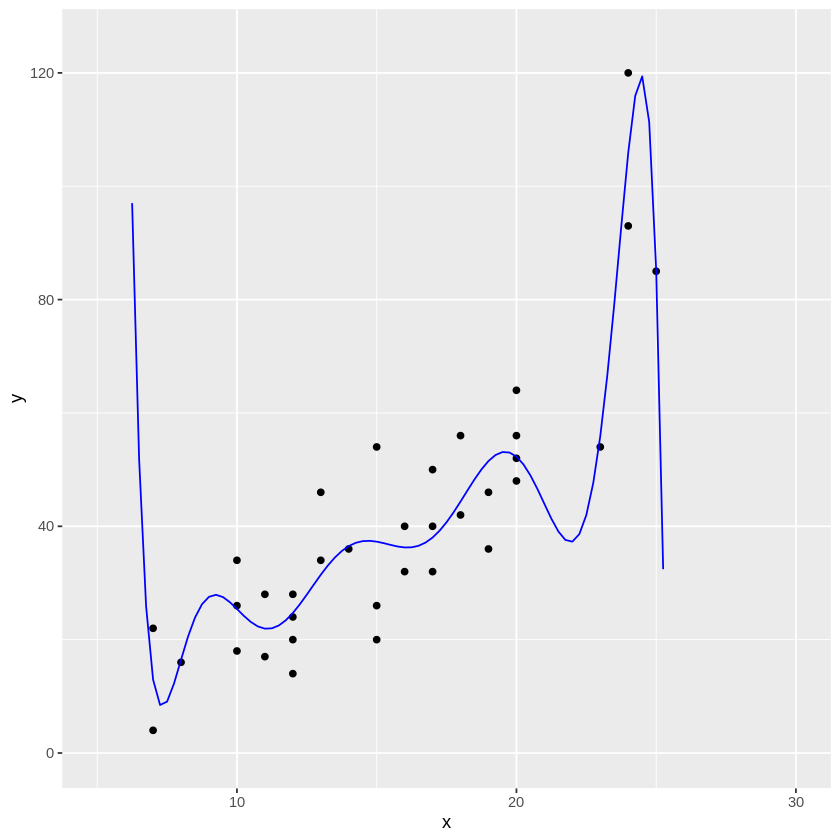

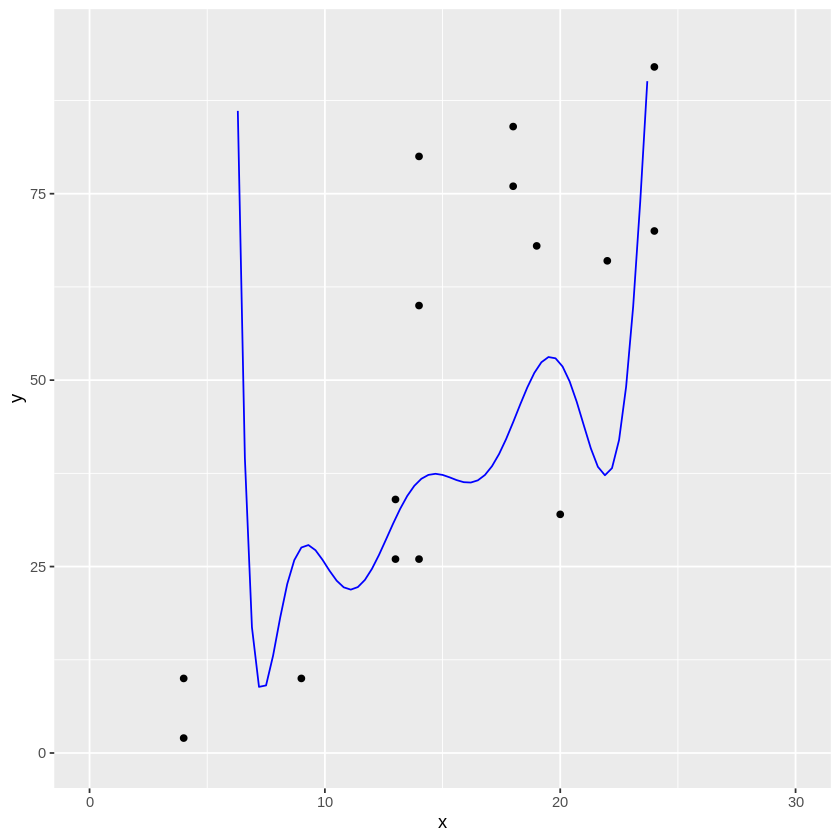

In [96]:
###################################################
# Ex.4-1： carsデータで多項式モデリング（過学習）
###################################################
library(tidyverse)
"---------------------------------------"
# [2] X1の全変数を使ったフルモデル（model1）

# 観測値1を使ったナイーブなモデル化（重回帰）
d <- data.frame(dat1$y, X1)
colnames(d)[1] <- 'y'
#head(d, 3)
model1 <- lm(y~., data=d)
summary(model1)

"---------------------------------------"
# [3] フルモデルの残差（訓練データ）

 a9 <- model1$coefficients   # 係数（昇べき順）
 RMSE(g(dat1$x, a9), dat1$y)
 MAE(g(dat1$x, a9), dat1$y)

"---------------------------------------"
# [4] 視覚化（訓練データの散布図とフルモデル）

ggplot(dat1, aes(x=x, y=y)) + geom_point() + 
    stat_function(fun=g, args=list(a=a9), color="blue") +
    xlim(c(5, 30)) + ylim(c(0, 125))

"---------------------------------------"
# テストデータで検証
# [5] フルモデルの残差（テストデータ）

 RMSE(g(dat2$x, a9), dat2$y)
 MAE(g(dat2$x, a9), dat2$y)

"---------------------------------------"
# テストデータで検証
# [6] 視覚化（テストデータの散布図とフルモデル）

ggplot(dat2, aes(x=x, y=y)) + geom_point() + 
stat_function(fun=g, args=list(a=a9), color="blue") +
    xlim(c(0, 30)) + ylim(c(0, 95))

####[7] このモデルについて,簡単にコメントしなさい.
乱数でデータを分けているため残差が0にならなかった。テストデータのRMSE,MAEの値が増加したため「訓練データへの適合性がよいモデルなのに,テストデータへの適合性は悪く、過学習が発生した。